# <big><big>Chap 5. pandas 시작하기</big></big>
 **<big>pandas</big>** = 라이브러리: NumPy 기반, 고수준의 자료 구조와 파이썬을 통한 빠르고 쉬운 데이터 분석 도구
   - 통합된 시계열 기능
   - 자동적, 명시적으로 축의 이름에 따라 데이터 정렬<br/>
     잘못 정렬된 데이터에 의해 일반적 오류 예방<br/>
     다양한 소스에서 가져온 다양한 방식으로 색인되어 있는 데이터를 다룰수 있는 기능
   - 시계열 데이터와 비시계열 데이터를 함께 다룰 수 있는 통합 자료 구조
   - 누락된 데이터를 유연하게 처리할 수 있는 기능
   - SQL 같은 일반 데이터베이스처럼 데이터를 합치고 관계연산을 수행하는 기능

In [1]:
from pandas import Series, DataFrame

In [2]:
import pandas as pd

In [3]:
import numpy as np

# <big> 5.1 pandas 자료 구조 소개</big>

## <big>5.1.1</big> series
 - 일련의 객체를 담을 수 있는 1차원 배열 같은 자료구조
 - 색인 배열의 데이터에 연관된 이름을 가짐

In [4]:
<big>pandas.Series(data, index, dtype, copy)<br>
Series can be created by Array, Dict, Scalar value </big>

SyntaxError: invalid syntax (<ipython-input-4-aab02d1611d1>, line 1)

In [ ]:
obj = Series([4, 7, -5, 3]) # 배열 데이터로부터 생성 가능
obj

Series 객체의 문자열 표현:

| 색인 | 값 |
|:---:|:---:|
| 0 | 4 |
| 1 | 7 |
| 2 | -5 |
| 3 | 3 |

In [ ]:
obj.values # series 배열

In [ ]:
obj.index # series 색인 객체

In [ ]:
# 데이터의 색인 지정
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

In [ ]:
obj2.index

In [ ]:
# 배열에서 값 선택 or 대입 시, 색인 이용
obj2['a']

In [ ]:
obj2['d'] = 6  # 'd' 색인의 값을 6으로 대체

obj2[['c', 'a', 'd']] # c, a, d 색인의 값만 선택

In [ ]:
# NumPy 배열 연산 수행에도 색인-값 연결 유지
obj2

In [ ]:
obj2[obj2>0]

In [ ]:
obj2 * 2

In [ ]:
np.exp(obj2) # import numpy as np 입력 상태에서

※ Series: 고정 길이의 정렬된 사전형(색인 값에 데이터를 매핑)

In [ ]:
'b' in obj2

In [ ]:
'e' in obj2   #obj2에 e가 있으면 True, 없으면 False

In [ ]:
# python의 사전 객체로부터 Series 객체 생성 → Series 객체 색인은 사전의 key 값 
sdata = {'Ohio':35000, 'Texas': 71000, 'Oregon':16000, 'Utah':5000} #python의 사전 객체 생성
obj3 = Series(sdata) # Series 객체 생성
obj3

In [ ]:
# sdata에 'California'에 대한 값 없음 → NaN(누락된 값) 표시
states = ['California', 'Ohio', 'Oregon', 'Texas']

obj4 = Series(sdata, index=states)
obj4

※ isnull, notnull 함수: 누락 값을 찾을 때 사용 <br/>
  → **Instance method**: 클래스 내부에 정의되어있는 함수를 호출할 때, 객체를 요구하는 메서드 

In [ ]:
pd.isnull(obj4)   #null이면 True

In [ ]:
pd.notnull(obj4)   #null이면 False

In [ ]:
obj4.isnull()   #Series는 인스턴스 메서드

In [ ]:
obj3

In [ ]:
obj4

In [ ]:
obj4.ndim

In [ ]:
# 다르게 색인 된 데이터에 대한 산술연산 가능
obj3 + obj4

In [ ]:
# name 속성
obj4.name = 'population' # Series의 이름 지정
obj4.index.name = 'state' # 색인에 대한 이름 지정
obj4

In [ ]:
obj

In [ ]:
# Series 색인: 대입을 통한 변경
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

In [ ]:
<big> Series를 만들고 연산을 실행하시오 [2, 4, 6, 8, 10], [1, 3, 5, 7, 9] </big>

## <big>5.1.2</big> DataFrame
 - 표와 같은 스프레드시트 형식의 자료구조로 여러 개의 칼럼이 있음
 - 각 칼럼은 서로 다른 종류의 값(숫자, 문자열, 불리언, ...)을 담을 수 있음
 - 로우와 칼럼에 대한 색인이 있음 → **DataFrame은 색인의 모양이 같은 series 객체를 담고 있는 파이썬 사전**
 - **데이터를 2차원 형식으로 저장** → 고차원의 표 형식 데이터를 쉽게 표현 가능

In [ ]:
<big> pandas.DataFrame(data, index, columns, dtype, copy )</big>

In [ ]:
# DataFrame 객체를 생성하는 기본적 방법: 같은 길이의 리스트에 담긴 사전, NumPy 배열 이용
data = {'state' : ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
         'year' : [2000, 2001, 2002, 2001, 2002],
         'pop' : [1.5, 1.7, 3.6, 2.4, 2.9]}

# 색인은 자동 대입, 칼럼은 정렬되어 저장
frame = DataFrame(data)
frame

In [ ]:
# 원하는 순의 column 지정
DataFrame(data, columns=['year', 'state', 'pop'])

In [ ]:
# Series와 같이 dat에 없는 값은 NA(NaN)로 저장
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                   index=['one','two','three','four','five'])
frame2

In [ ]:
frame2.columns   #column에 대한 정보

In [ ]:
# 사전 형식의 표기법으로 접근, 속성 형식으로 접근 가능
frame2['state']

In [ ]:
frame2.year

In [ ]:
# 반환된 Series 객체가 DataFrame 같은 색인을 가지면 알맞은 값으로 name 속성이 채워짐
# row는 위치나 ix 같은 메서드를 통해 접근 가능
frame2.ix['three']

In [ ]:
# 컬럼 대입 가능: 빈 debt 칼럼에 스칼라 값 대입
frame2['debt'] = 16.5
frame2

In [ ]:
# 배열의 값 대입
frame2['debt'] = np.arange(5.)
frame2

In [ ]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five']) # 지정된 색인에 -1.2, -1.5, -1.7 대입

frame2['debt'] = val # debt 칼럼에 생성한 val 대입

frame2

In [ ]:
# 없는 칼럼에 대입: 새로운 칼럼 생성
frame2['eastern']= frame2.state == 'Ohio' # state 칼럼이 Ohio면 True
frame2

In [ ]:
del frame2['eastern'] # python 사전형과 동일하게 del 예약어로 


In [ ]:
frame2.columns

**<정리>** <br/>
리스트나 배열을 칼럼에 대입 시, 값의 길이가 dataframe의 크기와 동일해야 함. <br/>
Series 대입 시, dataframe의 색인에 따라 값 대입(없는 색인에는 값 대입 불가능) <br/>

※ DataFrame의 색인을 이용해 생성된 칼럼은 실제 DataFrame에 적용<br/>
따라서 실제 DataFrame에 적용하지 않고 새로운 복사본에 적용하고자 할 경우, copy 메서드 사용

In [ ]:
# 중첩된 사전 생성
pop = {'Nevada' : {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [ ]:
# 바깥의 key 값 = 칼럼: Nevada, Ohio
# 안의 key 값 = 로우: 2000, 2001, 2002
frame3 = DataFrame(pop)
frame3

In [ ]:
# 결과 값 순서 뒤집기
frame3.T

In [ ]:
# 중첩된 사전을 이용할 경우, 안 쪽 key 값에 의해 자동 색인 → 지정 가능
DataFrame(pop, index=[2001, 2002, 2003])

In [ ]:
# Series 객체를 담은 사전도 같은 방식
pdata = {'ohio' : frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
DataFrame(pdata)

In [ ]:
# index와 column 이름 설정
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

In [ ]:
# values 속성: DataFrame에 저장된 데이터를 2차원 배열로 반환
frame3.values

In [ ]:
# DataFrame의 칼럼에 서로 다른 dtype → 칼럼 배열의 dtype 선택
# frame2.columns할 경우, dtype = object
frame2.values

<DataFrame 생성자에서 사용가능한 입력 데이터>


※ DataFrame 생성자에서 사용 가능한 입력 데이터

형 | 설명
:--- | :---
2차원 ndarray | 데이터를 담고 있는 행렬<br/> 선택적으로 로우와 칼럼 이름 전달 가능
배열, 리스트, 튜플의 사전 | 사전의 모든 항목은 같은 길이를 가져야 하며, <br/> 각 항목의 내용이 DataFrame의 칼럼
NumPy의 구조화 배열 | 배열의 사전과 같은 방식으로 취급
Series 사전 | Series의 각 값이 칼럼. 명시적으로 색인을 넘겨주지 않으면<br/> 각 Series의 색인이 하나로 합쳐져서 로우의 색인이 됨
사전의 사전 | 내부에 있는 사전이 칼럼이 됨<br/> key 값은 'Series의 사전'과 마찬가지로 합쳐져 로우의 색인이 됨.
사전이나 Series의 리스트 | 리스트의 각 항목이 DataFrame의 로우.<br/> 합쳐진 사전의 key 값이나 Series의 색인이 DataFrame 칼럼 이름.
리스트나 튜플의 리스트 | '2차원 ndarray'와 같은 방식으로 취급
다른 DataFrame | 색인이 따로 지정되지 않는다면 DataFrame의 색인이 그대로 사용
NumPy MaskedArray | '2차원 ndarray'와 같은 방식으로 취급되지만<br/> 마스크 값은 반환되는 DataFrame에서 NA값이 됨

## <big>5.1.3</big> 색인 객체
 - pandas의 색인 객체: 표 형식의 데이터에서 각 로우와 칼럼에 대한 이름과 다른 메타데이터를 저장하는 객체
 - pandas의 주요 Index 객체

클래스 | 설명
:---- | :----
Index | 가장 일반적인 Index 객체<br/> 파이썬 객체의 Numpy 배열 형식으로 축의 이름 표현
Int64Index | 정수 값을 위한 특수 Index
MultiIndex | 단일 축에 여러 단계의 색인을 표현하는 계층적 색인 객체<br/> 튜플의 배열와 유사하지 않음
DatetimeIndex | 나노초 타임스탬프를 저장<br/> (NumPy의 datetime64 dtype으로 표현)
PeriodIndex | 기간 데이터를 위한 특수 Index

 - 배열과 유사하게 Index 객체도 고정 크기로 동작

In [ ]:
obj = Series(range(3), index=['a', 'b', 'c'])

In [ ]:
index = obj.index
index

In [ ]:
index[1:]

In [ ]:
index[1] = 'd'   #색인 객체는 변경 불가능

In [ ]:
index = pd.Index(np.arange(3))

In [ ]:
obj2 = Series([1.5, -2.5, 0], index=index)

In [ ]:
index

In [ ]:
obj2.index

In [ ]:
obj2.index is index   #obj2.index의 값과 index의 값이 같은지 비교

In [ ]:
frame3

In [ ]:
'Ohio' in frame3.columns # 칼럼에 Ohio가 있는지

In [ ]:
2003 in frame3.index # 색인에 2003이 있는지

※ 색인 메서드와 속성

메서드 | 설명
:---- | :----
append | 추가적 Index 객체를 붙여 새로운 색인 반환
diff | 색인의 차집합 반환
intersection | 색인의 교집합 반환
union | 색인의 합집합 반환
isin | 넘겨받은 값이 해당 색인 위치에 존재하는지 불리언 배열로 반환
delete | i 위치의 색인이 삭제된 새로운 색인 반환
drop | 넘겨받은 값이 삭제된 새로운 색인 반환
insert | i 위치에 값이 추가된 새로운 색인 반환
is_monotonic | 색인이 단조성을 가진다면 True 반환
is_unique | 중복되는 색인이 없다면 True 반환
unique | 색인에서 중복되는 요소 제거 후 유일 값 반환

# <big> 5.2 핵심 기능</big>
 - Series나 DataFrame에 저장된 데이터를 다루는 기본 방법 설명

## <big>5.2.1</big> 재색인
- reindex: 새로운 색인에 맞도록 객체를 새로 생성

In [ ]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e']) # obj 데이터를 새로운 색인에 맞게 재배열, e 같이 없는 색인 값은 NaN 처리
obj2

In [ ]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)   #비어있는경우 0으로 채움

In [ ]:
obj3 = Series(['blue', 'purple', 'yellow'], index=[0,2,4])
obj3

In [ ]:
obj3.reindex(range(6), method='ffill')

※ **reindex 메서드(보간) 옵션**
- ffill/ pad : 앞의 값으로 채워 넣음
- bfill/ backfill : 뒤의 값으로 채워 넣음 

DataFrame에 대한 reindex: (로우)색인, 칼럼 or 둘 다 변경 가능. 그냥 순서만 전달하면 로우가 재색인 됨

In [ ]:
frame = DataFrame(np.arange(9).reshape((3,3)), index=['a', 'c', 'd'], 
                  columns=['Ohio', 'Texas', 'California'])
frame

In [ ]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2   #인덱스가 추가 되어도 재색인

Coloumns 예약어를 사용한 재색인

In [ ]:
states = ['Texas', 'Utah', 'California']

In [ ]:
frame.reindex(columns=states)

In [ ]:
# 로우와 칼럼을 모두 한번에 재색인 할 수있지만, 보간은 로우에 대해서만(axis 0)
frame.reindex(index=['a', 'b', 'c', 'd'], columns = states).fillna(method = 'ffill')

**<big>수정</big>** <br/>
frame.reindex(..., method = 'ffill')은 오류<br/>
 → frame.reindex(...).fillna(method='ffill')<br/>
 
_fillna 메서드를 사용하여 수정_

In [ ]:
# ix를 이용해 라벨로 색인
frame.ix[['a', 'b', 'c', 'd'], states]

※ 재색인 함수 인자

인자 | 설명
:--- | :---
index | 색인으로 사용할 새로운 순서. Index 인스턴스나<br/> 다른 순차적인 자료 구조 사용 가능. 복사없이 그대로 사용
method | 보간 메서드(ffill, bfill)
fill_value | 재색인 과정 중에 새롭게 나타나는 빈 data 채우기 위한 값
limit | 전/ 후 보간 시에 사용할 최대 갭 크기
level | MultiIndex 단계에 단순 색인을 맞춤. 그렇지 않으면 MultiIndex의 하위 부분집합에 맞춤
copy | True인 경우 새로운 색인이 이전 색인과 같더라도 데이터를 복사.<br/> False라면 두 색인이 같은 경우 데이터 복사 않음 

## <big>5.2.2</big> 하나의 로우 또는 칼럼 삭제하기
 색인 배열, 삭제하려는 로우나 칼럼이 제외된 리스트를 가지고 있을 경우,<br/> 로우나 칼럼을 쉽게 삭제 가능 → 데이터 모양 변경 작업 필요
 - drop 메서드: 선택 값이 삭제된 새로운 객체 생성

In [ ]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

In [ ]:
new_obj = obj.drop('c') # 색인 c 삭제
new_obj

In [ ]:
obj.drop(['d', 'c'])

In [ ]:
# DataFrame에서는 로우와 칼럼 모두에서 값을 삭제 가능
data = DataFrame(np.arange(16).reshape((4, 4)), 
                 index=['Ohio', 'Colorado', 'Utah', 'New York'], 
                 columns=['one', 'two', 'three', 'four'])
data

In [ ]:
data.drop(['Colorado', 'Ohio'])

In [ ]:
data.drop('two', axis=1) # axis=0은 default값

In [ ]:
data.drop(['two', 'four'], axis=1)

## <big>5.2.3</big> 색인하기, 선택하기, 자르기

In [ ]:
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

In [ ]:
obj['b'] # Series는 Numpy 배열과 다르게 색인이 정수(1)가 아니어도 됨

In [ ]:
obj[1]

In [ ]:
obj[2:4]

In [ ]:
obj[['b', 'a', 'd']]

In [ ]:
obj[[1,3]]

In [ ]:
obj[obj<2]

In [ ]:
# 라벨 이름으로 슬라이싱: **시작점과 끝점 포함**
obj['b':'c']

In [ ]:
obj['b':'c'] = 5
obj

In [ ]:
# DataFrame에서 칼럼의 값을 하나 이상 가져올 수 있음
data = DataFrame(np.arange(16).reshape((4,4)), 
                 index=['Ohio', 'Colorado', 'Utah', 'New York'], 
                 columns=['one', 'two', 'three', 'four'])

In [ ]:
data

In [ ]:
data['two']

In [ ]:
data[['three', 'one']]

In [ ]:
# 슬라이싱으로 로우 선택 가능
data[:2]

In [ ]:
# 불리언 배열로 칼럼 선택 가능
data[data['three']>5]

In [ ]:
# 스칼라 비교를 통해 생성된 불리언 DataFrame을 사용해 값 선택
data<5

In [ ]:
data[data<5] = 0

In [ ]:
data

※ **DataFrame의 칼럼에 대해 라벨로 색인하는 방법**
- ix: NumPy와 비슷한 방식 + 축의 라벨을 사용해 DataFrame의 로우, 칼럼 선택

In [ ]:
data.ix['Colorado', ['two', 'three']] # Colorado 행의 two, three 열

In [ ]:
data.ix[['Colorado', 'Utah'], [3,0,1]]

In [ ]:
data.ix[2]

In [ ]:
data.ix[:'Utah', 'two']

In [ ]:
data.ix[data.three>5, :3]   # 칼럼의 three의 값에서 5보다 큰 index중에서 컬럼 3번째 까지만 출력

※ DataFrame의 값 선택

방식|설명
:---|:---
obj[val]|DataFrame에서 하나의 칼럼 또는 여러 칼럼 선택.<br/> 불리언 배열, 슬라이스, 불리언 DataFrame 사용
obj.ix[val]|DataFrame에서 로우의 부분집합 선택
obj.ix[:, val]|DataFrame에서 칼럼의 부분집합 선택
obj.ix[val1, val2]|DataFrame에서 로우와 칼럼의 부분집합 선택
reindex 메서드|하나 이상의 축을 새로운 색인으로 맞춤
xs 메서드|라벨 이름으로 단일 로우나 칼럼을 Series 형식으로 선택
icol, irow 메서드|각각 정수 색인으로 단일 로우나 칼럼을 Series 형식으로 선택
get_value, set_value 메서드|로우와 칼럼 이름으로 DataFrame 값 선택

## <big>5.2.4</big>산술연산과 데이터 정렬
객체를 더할 때 짝이 맞지 않는 색인은 결과에 두 색인 통합

In [ ]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a','c','d','e'])
s1

In [ ]:
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a','c','e','f', 'g'])
s2

In [ ]:
s1 + s2   #겹치는 색인이 없는 경우, NA로 표시

In [ ]:
df1 = DataFrame(np.arange(9.).reshape((3,3)), 
                columns=list('bcd'), index=['Ohio', 'Texas', 'Colorado'])

In [ ]:
df2 = DataFrame(np.arange(12.).reshape((4,3)), 
                columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [ ]:
df1

In [ ]:
df2

In [ ]:
df1 + df2 # 각 DataFrame에 있는 색인과 컬림이 하나로 합쳐짐

<br/>**<big>산술연산 메서드에 채워 넣을 값 지정하기</big>**

In [ ]:
# 서로 다른 색인을 가지는 객체 간 산술연산
df1 = DataFrame(np.arange(12.).reshape((3,4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4,5)), columns=list('abcde'))

In [ ]:
df1

In [ ]:
df2

In [ ]:
df1 + df2   #겹치지 않는 부분의 값은 NaN

In [ ]:
df1.add(df2, fill_value=0)   #df1에 df2의 값을 채워 넣으며, 같이 가지고 있는 값의 경우에는 덧셈

In [ ]:
df1.reindex(columns=df2.columns, fill_value=0)   #df1의 인덱스에 column은 df2의 칼럼으로 채우기

※ 산술연산 메서드

메서드|설명
:---|:---
add| 덧셈을 위한 메서드
sub| 뺄셈을 위한 메서드
div| 나눗셈을 위한 메서드
mul| 곱셈을 위한 메서드

### DataFrame과 Series 간의 연산
DataFrame과 Series의 산술연산: Series 색인을 DataFrame 칼럼에 맞추고 아래 로우로 전파

In [ ]:
arr = np.arange(12.).reshape((3,4))

In [ ]:
arr

In [ ]:
arr[0]

In [ ]:
arr - arr[0]   #arr의 각 행마다 arr[0]의 값만큼 뺄셈

In [ ]:
frame = DataFrame(np.arange(12.).reshape((4,3)), 
                  columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [ ]:
series = frame.ix[0] #series에 Utah 로우 값

In [ ]:
frame

In [ ]:
series 

In [ ]:
frame - series

In [ ]:
# 색인 값을 DataFrame 칼럼이나 Series 색인에서 찾지 못한 경우, 재색인
series2 = Series(range(3), index=['b', 'e', 'f'])
series2

In [ ]:
frame + series2

In [ ]:
series3 = frame['d'] # frame의 d 칼럼만 포함

In [ ]:
frame

In [ ]:
series3

In [ ]:
frame.sub(series3, axis=0) # 산술연산 메서드

## <big>5.2.5</big> 함수 적용과 매핑
pandas 객체 또한 NumPy 유니버셜 함수(배열의 각 원소에 적용되는 메서드) 적용 가능

In [ ]:
frame = DataFrame(np.random.randn(4,3), columns=list('bde'), 
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [ ]:
frame

In [ ]:
np.abs(frame)   # 절대값

<br/>자주 사용되는 또 다른 연산: 각 로우나 칼럼의 1차원 배열에 함수를 적용 → apply 메서드<br/>
* 배열의 합계, 평균 같은 일반적인 통계는 DataFrame의 메서드로 있으므로 apply() 메소드를 사용해야만 하는 것은 아님

In [ ]:
f = lambda x: x.max() - x.min()

※ lambda 매개변수: 반환값<br/>
: '매개변수' 하나를 받고, '반환값'에 대한 값을 반환<br/>

따라서, lambda x: x.max() - x.min()는<br/>
매개변수 x를 하나 받고, x의 최대값-최소값 을 반환

In [ ]:
frame.apply(f)   # b의 칼럼 값에서 가장 큰 값과 가장 작은 값의 차

In [ ]:
frame.apply(f, axis=1)   # 각 색인의 칼럼 값에서 가장 큰 값과 가장 작은 값의 차

In [ ]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])

In [ ]:
frame.apply(f)   # min과 max로 인덱싱 후에 각 칼럼에서의 최대, 최소값을 구함

<br/> **applymap**
- 실수 값을 문자열 포맷으로 변환
- Series가 각 원소에 적용할 함수를 지정하기 위한 map 메서드 소유

In [ ]:
format = lambda x: '%.2f' % x

In [ ]:
frame

In [ ]:
frame.applymap(format)

In [ ]:
frame['e'].map(format)

## <big>5.2.6</big>정렬과 순위
sort_index 메서드: 정렬된 새로운 객체 반환

In [ ]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])

In [ ]:
obj.sort_index()   # 알파벳 순으로 정렬

<br/>로우나 칼럼 중 하나의 축을 기준으로 정렬 가능

In [ ]:
frame = DataFrame(np.arange(8).reshape((2,4)), 
                  index=['three', 'one'], columns=['d','a','b','c'])

In [ ]:
frame.sort_index()   # 로우 정렬

In [ ]:
frame.sort_index(axis=1)   # axis=1: 칼럼 정렬

<br/>order 메서드: Sereis 객체를 값에 따라 정렬 → sort_values()로 수정

In [ ]:
obj = Series([4,7,-3, 2])

In [ ]:
obj

In [ ]:
obj.sort_values()

**<big>수정</big>** <br/>
AttributeError: 'Series' object has no attribute 'order'<br/>
order( ) → sort_values( )

In [ ]:
# Series객체에서 비어있는 값은 기본적으로 가장 마지막에 위치하도록 정렬
obj = Series([4,np.nan, 7,np.nan,-3, 2])

In [ ]:
obj.sort_values( )

by 옵션: DataFrame에서는 하나 이상의 칼럼에 있는 값으로 정렬이 필요<br/>
 by 옵션을 통해 칼럼 이름 설정

In [ ]:
frame = DataFrame({'b': [4,7,-3,2], 'a':[0,1,0,1]})
frame

In [ ]:
frame.sort_values(by='b')   # b 칼럼에 대해 정렬

**<big>수정</big>**<br/>
경고창 메시지: by argument to sort_index is deprecated, pls use .sort_values(by=...)<br/>
sort_index → sort_values

In [ ]:
frame.sort_values(by=['a', 'b'])   # 여러 개의 칼럼 정렬, 칼럼의 이름이 담긴 리스트를 전달

In [ ]:
frame.sort_values(by=['b', 'a'])  

**<big>순위</big>**
- 정렬과 거의 흡사, 1부터 배열의 유효한 데이터 개수까지 순위를 매김
- numpy.argsort에서 반환하는 간접 정렬 색인과 유사
- 동률인 순위를 처리하는 방식이 다름
- Series와 DataFrame의 rank 메서드는 동점인 항목에 대해서는 평균 순위를 매김

In [ ]:
obj = Series([7, -5, 7, 4, 2, 0, 4])

In [ ]:
obj.rank() # 데이터 입력 순으로 순위 계산

In [ ]:
obj.rank(method='first') # 데이터 상에서 나타나는 순서에 따라

In [ ]:
obj.rank(ascending=False, method='max') # 내림차순

In [ ]:
frame = DataFrame({'b':[4.3, 7, -3, 2], 'a':[0, 1, 0, 1], 
                   'c':[-2, 5, 8, -2.5]})
frame

In [ ]:
frame.rank(axis=1) # 칼럼에 대한 순위

※ 순위의 동률을 처리하는 메서드

메서드 | 설명
:---- | :----
'average' | 기본 값: 같은 값을 가지는 항목의 평균 값을 순위로 삼음
'min' | 같은 값을 가지는 그룹을 낮은 순위로 매김
'max' | 같은 값을 가지는 그룹을 높은 순위로 매김
'first' | 데이터 내에서 위치에 따라 순위를 매김

## <big>5.2.7</big> 중복 색인
색인 값이 중복된 경우

In [ ]:
obj = Series(range(5), index=['a', 'a', 'b', 'b', 'c']) # 색인 값 동일: 'a' 2개, 'b' 2개
obj

<br/>is_unique 속성: 해당 값이 유일한지 아닌지

In [ ]:
obj.index.is_unique   # False: 색인 값들이 중복

In [ ]:
# 중복 색인이 있는 경우, 하나의 Series 객체 반환
obj['a']

In [ ]:
obj['c']

In [ ]:
df = DataFrame(np.random.randn(4,3), index=['a','a','b','b'])

In [ ]:
df

In [ ]:
df.ix['b']   # DataFrame에서 로우를 선택하는 것도 동일

# <big> 5.3 기술통계 계산과 요약</big>
pandas: 수학 메서드+통계 메서드<br/>
- 하나의 칼럼이나 로우에서 단일 값을 구하는 축소, 요약 통계<br/>
- 누락된 데이터를 제외하도록 설계

In [ ]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5], 
                [np.nan, np.nan], [0.75, -1.3]], 
               index=['a','b','c','d'], 
               columns=['one','two'])

In [ ]:
df

In [ ]:
df.sum()   # sum 메서드: 칼럼의 합을 담은 Series 반환

In [ ]:
df.sum(axis=1)   # axis=1: 각 로우의 합 반환

In [ ]:
df.mean(axis=1, skipna=False)   # skipna: NA값을 제외시킬지

※ 축소 메서드 옵션

옵션|설명
:---|:---
axis|연산을 수행할 축. DataFrame에서 0은 로우, 1은 칼럼
skipna|누락된 값을 제외할지 정하는 옵션. 기본 값=True
level|계산하려는 축이 다중 색인인 경우, 레벨에 따라 묶어 계산

<br/> idmin, idmax 메서드: 최소, 최대값을 가지는 색인 값 같은 간접 통계 반환 

In [ ]:
df.idxmax() # 각 칼럼에서 최대값을 가지고 있는 색인 출력

In [ ]:
df.cumsum() # 누산

In [ ]:
df.describe()   # describe 메서드: 한번에 여러 개의 통계 결과 생성

In [ ]:
obj = Series(['a', 'a', 'b', 'c'] * 4)
obj

In [ ]:
obj.describe() # 수치 데이터가 아닌 경우

※ 기술통계와 요약통계

메서드|설명
:---|:---
count | NA 값을 제외한 값의 수 반환
describe | Series나 DataFrame의 각 칼럼에 대한 요약통계 계산
min, max | 최소, 최대값
argmin, argmax | 각각 최소, 최대값을 가지는 색인의 위치(정수) 반환
idmin, idmax | 각각 최소, 최대값을 가지는 색인의 값 반환
qauntile | 0부터 1까지의 분위수 계산
sum | 합
mean | 평균
median | 중앙값
mad | 평균 값에서 절대 평균편차
var | 표본 분산
std | 표본 정규 분산
skew | 표본 비대칭도
kurt | 표본 첨도
cumsum | 누적 합
summin, cummax | 누적 최소값, 최대값
cumprod | 누적 곱
diff | 1차 산술 차
pct_change | 퍼센트 변화율

## <big>5.3.1</big> 상관관계와 공분산
- 인자가 2벌 필요

**<big>수정</big>**
 1. 설치: cmd에 pip install pandas_datareader 입력
 2. import pandas.io.data as wed → import pandas_datareader.data as web 수정
 3. GooG → GooGL
 4. yahoo에서 에러 발생 → google
 5. iteritems → items
 6. Adj Close → Close

In [ ]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2010, 1, 1)

all_data={}

for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOGL']:
    all_data[ticker]=web.DataReader(ticker, 'google', start, end)

price=DataFrame({tic: data['Close'] 
                 for tic, data in all_data.items()})
volume=DataFrame({tic: data['Volume'] 
                  for tic, data in all_data.items()})

In [29]:
price = pd.read_pickle('yahoo_price.pkl')
volume = pd.read_pickle('yahoo_volume.pkl')

In [30]:
len(price)

1714

In [31]:
price.head()


,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,27.990226,313.062468,113.304536,25.884104
2010-01-05,28.038618,311.683844,111.935822,25.892466
2010-01-06,27.592626,303.826685,111.208683,25.733566
2010-01-07,27.541619,296.753749,110.823732,25.465944
2010-01-08,27.724725,300.709808,111.935822,25.641571


In [33]:
volume.head(10)

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,123432400,3927000,6155300,38409100
2010-01-05,150476200,6031900,6841400,49749600
2010-01-06,138040000,7987100,5605300,58182400
2010-01-07,119282800,12876600,5840600,50559700
2010-01-08,111902700,9483900,4197200,51197400
2010-01-11,115557400,14479800,5730400,68754700
2010-01-12,148614900,9742900,8081500,65912100
2010-01-13,151473000,13041800,6455400,51863500
2010-01-14,108223500,8511900,7111800,63228100


In [34]:
# 각 주식의 퍼센트 변화율
returns = price.pct_change()

In [35]:
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-17,-0.000680,0.001837,0.002072,-0.003483
2016-10-18,-0.000681,0.019616,-0.026168,0.007690
2016-10-19,-0.002979,0.007846,0.003583,-0.002255
2016-10-20,-0.000512,-0.005652,0.001719,-0.004867
2016-10-21,-0.003930,0.003011,-0.012474,0.042096


<br/>corr 메서드: NA가 아니고 정렬된 색인에서 연속하는 두 Series에 대해 상관관계를 계산
<br/>cov메서드: 공분산 계산

In [36]:
returns.MSFT.corr(returns.IBM)

0.49976361144151138

In [37]:
returns.MSFT.cov(returns.IBM)

8.8706554797035462e-05

In [38]:
# DataFrame에서 corr, cov 메서드: DataFrame 행렬상에서 상관관계, 공분산 계산
returns.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.407919,0.386817,0.389695
GOOG,0.407919,1.000000,0.405099,0.465919
IBM,0.386817,0.405099,1.000000,0.499764
MSFT,0.389695,0.465919,0.499764,1.000000


In [39]:
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.000277,0.000107,0.000078,0.000095
GOOG,0.000107,0.000251,0.000078,0.000108
IBM,0.000078,0.000078,0.000146,0.000089
MSFT,0.000095,0.000108,0.000089,0.000215


<br/> corrwith 메서드
- 다른 Series나 DataFrame과의 상관관계 계산
- Series를 넘기면 각 컬럼에 대해 계산한 상관관계를 담은 Series 반환

In [40]:
returns.corrwith(returns.IBM)

AAPL    0.386817
GOOG    0.405099
IBM     1.000000
MSFT    0.499764
dtype: float64

In [41]:
# 시가 총액의 퍼센트 변화율에 대한 상관관계
returns.corrwith(volume)

AAPL   -0.075565
GOOG   -0.007067
IBM    -0.204849
MSFT   -0.092950
dtype: float64

## <big>5.3.2</big> 유일 값, 값 세기, 멤버십

In [42]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [43]:
# unique 함수: Series에서 중복되는 값 제거 후 유일 값 담은 Series 반환
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [44]:
obj.value_counts()   # Series에서 도수를 계산해 내림차순 반환

a    3
c    3
b    2
d    1
dtype: int64

In [45]:
pd.value_counts(obj.values, sort=False)

d    1
c    3
a    3
b    2
dtype: int64

<br/>isin 메서드
- 어떤 값이 Series에 있는지 나타내는 불리언 벡터 반환
- 칼럼에서 값을 골라내고 싶을 때 유용

In [46]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [47]:
obj[mask]   # true값만 출력

0    c
5    b
6    b
7    c
8    c
dtype: object

※ 유일 값, 값 세기, 버리기 메서드

메서드|설명
:---|:---
isin|Series의 각 원소가 넘겨받은 연솓된 값에 속하는지를 나타내는 불리언 배열 반환
unique|Series에서 중복되는 값을 제거 후 유일 값만 포함하는 배열 반환<br/> 결과는 Series에서 발견된 순서대로
value_counts|Series에서 유일 값에 대한 색인 값과 도수 계산<br/> 결과는 도수값의 내림차순으로 정렬

In [48]:
data = DataFrame({'Qu1': [1, 3, 4, 3, 4],
                  'Qu2': [2, 3, 1, 2, 3],
                  'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


<br/> DataFrame의 여러 행에 대한 히스토그램 구하기
- value_counts 메서드 결과가 DataFrame의 칼럼 크기보다 작은 경우, 비어있는 값은 0으로

In [22]:
result = data.apply(pd.value_counts)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [23]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [27]:
%matplotlib inline

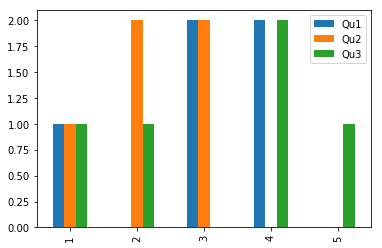

In [28]:
import matplotlib.pyplot as plt
result.plot.bar()

# <big> 5.4 누락된 데이터 처리하기</big>

In [49]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [50]:
string_data.isnull()   # null값이 있는경우 true 출력

0    False
1    False
2     True
3    False
dtype: bool

In [51]:
string_data[0]

'aardvark'

In [52]:
string_data[0] = None

In [53]:
string_data

0         None
1    artichoke
2          NaN
3      avocado
dtype: object

In [54]:
string_data.isnull()   # NaN, None값 같이 실수든, 누락이든 모두 NA값으로 취급

0     True
1    False
2     True
3    False
dtype: bool

※ NA 처리 메서드

인자|설명
:--|:--
dropna|누락된 데이터가 있는 축(로우, 칼럼) 제외.<br/>어느 정도의 누락 데이터까지 용인할 것인지 지정 가능
fillna|누락된 데이터를 대신할 값을 채우거나 보간 메서드 적용
isnull|누락되거나 NA값을 알려주는 불리언 값이 저장된, 같은 형의 객체 반환
notnull|isnull과 반대

## <big>5.4.1</big> 누락된 데이터 골라내기
- dropna 메서드: 실제 데이터가 들어있는 색인 값과 데이터를 Series 값으로 반환

In [55]:
from numpy import nan as NA

In [56]:
data = Series([1, NA, 3.5, NA, 7])
data.dropna()   # NA 값 제외

0    1.0
2    3.5
4    7.0
dtype: float64

In [57]:
data[data.notnull()]   # 불리언 색인을 이용해 NA값이 아닌 값만 출력

0    1.0
2    3.5
4    7.0
dtype: float64

In [58]:
data = DataFrame([[1., 6.5, 3.], [1., NA, NA],
                  [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()   # NA 값 제외

data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [59]:
cleaned   # NA가 아예 없는 로우만 출력

,0,1,2
0,1.0,6.5,3.0


In [60]:
data.dropna(how='all')   # 모든 값이 NA인 로우만 제외

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [61]:
data[4] = NA
data   # 새로운 칼럼을 추가

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [62]:
data.dropna(axis=1, how='all')   # 칼럼을 기준으로 모든 값이 NA인 경우만 제외

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [63]:
df = DataFrame(np.random.randn(7, 3))

df

,0,1,2
0,0.299173,-0.311924,-1.466091
1,0.945354,0.604366,-0.338670
2,0.737078,-0.801712,-0.972869
3,1.119055,2.599700,-0.628740
4,0.285094,1.869671,-0.338765
5,-0.759527,0.071455,-0.677961
6,-1.380550,-0.880428,1.165092


In [64]:
df.ix[:4,1]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0   -0.311924
1    0.604366
2   -0.801712
3    2.599700
4    1.869671
Name: 1, dtype: float64

In [65]:
df.ix[:4, 1] = NA; 

In [66]:
df

,0,1,2
0,0.299173,NaN,-1.466091
1,0.945354,NaN,-0.338670
2,0.737078,NaN,-0.972869
3,1.119055,NaN,-0.628740
4,0.285094,NaN,-0.338765
5,-0.759527,0.071455,-0.677961
6,-1.380550,-0.880428,1.165092


In [67]:
df.ix[:2,2]=NA

In [68]:
df

,0,1,2
0,0.299173,NaN,NaN
1,0.945354,NaN,NaN
2,0.737078,NaN,NaN
3,1.119055,NaN,-0.628740
4,0.285094,NaN,-0.338765
5,-0.759527,0.071455,-0.677961
6,-1.380550,-0.880428,1.165092


In [69]:
df.dropna(thresh=3)   # thresh 옵션: n개 이상의 값이 포함된 행 출력

,0,1,2
5,-0.759527,0.071455,-0.677961
6,-1.380550,-0.880428,1.165092


## <big>5.4.2</big> 누락된 값 채우기

In [70]:
df

,0,1,2
0,0.299173,NaN,NaN
1,0.945354,NaN,NaN
2,0.737078,NaN,NaN
3,1.119055,NaN,-0.628740
4,0.285094,NaN,-0.338765
5,-0.759527,0.071455,-0.677961
6,-1.380550,-0.880428,1.165092


In [71]:
df.fillna(0)

,0,1,2
0,0.299173,0.000000,0.000000
1,0.945354,0.000000,0.000000
2,0.737078,0.000000,0.000000
3,1.119055,0.000000,-0.628740
4,0.285094,0.000000,-0.338765
5,-0.759527,0.071455,-0.677961
6,-1.380550,-0.880428,1.165092


In [72]:
df.fillna({1: 0.5, 3: -1})   # 1번 칼럼에서 NA(0)는 0.5로, 3번 칼럼에는 NaN를 채움

,0,1,2
0,0.299173,0.500000,NaN
1,0.945354,0.500000,NaN
2,0.737078,0.500000,NaN
3,1.119055,0.500000,-0.628740
4,0.285094,0.500000,-0.338765
5,-0.759527,0.071455,-0.677961
6,-1.380550,-0.880428,1.165092


In [73]:
# fillna는 값을 채워 넣은 객체의 참조를 반환
_ = df.fillna(0, inplace = True)
df

,0,1,2
0,0.299173,0.000000,0.000000
1,0.945354,0.000000,0.000000
2,0.737078,0.000000,0.000000
3,1.119055,0.000000,-0.628740
4,0.285094,0.000000,-0.338765
5,-0.759527,0.071455,-0.677961
6,-1.380550,-0.880428,1.165092


In [74]:
# 보간 메서드 사용 가능
df = DataFrame(np.random.randn(6,3))

In [75]:
df.ix[2:, 1] = NA; df.ix[4:, 2] = NA   # 색인 2번째 행부터 끝까지 + 1번 칼럼에 NA, 색인 4번째 행부터 끝까지 + 2번 칼럼에 NA

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [76]:
df

,0,1,2
0,0.227968,-0.357333,0.706179
1,-1.266489,1.001753,0.972933
2,1.044991,NaN,-0.169321
3,1.525738,NaN,-0.282850
4,1.050794,NaN,NaN
5,1.431064,NaN,NaN


In [77]:
df.fillna(method='ffill') # NA값을 앞의 값으로 대체

,0,1,2
0,0.227968,-0.357333,0.706179
1,-1.266489,1.001753,0.972933
2,1.044991,1.001753,-0.169321
3,1.525738,1.001753,-0.282850
4,1.050794,1.001753,-0.282850
5,1.431064,1.001753,-0.282850


In [78]:
df.fillna(method='ffill', limit=2)  # limit: 위의 값을 가져오되, 2번까지만 가져오도록

,0,1,2
0,0.227968,-0.357333,0.706179
1,-1.266489,1.001753,0.972933
2,1.044991,1.001753,-0.169321
3,1.525738,1.001753,-0.282850
4,1.050794,NaN,-0.282850
5,1.431064,NaN,-0.282850


In [79]:
data = Series([1., NA, 3.5, NA, 7])

In [80]:
data.fillna(data.mean())   # 빈 공간을 바로 위의 값으로 채우며 각 색인의 평균값 계산

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

※ fillna 함수 인자

인자|설명
:--|:--
value|비어있는 값을 채울 스칼라 값이나 사전 형식의 객체
method|보간 방식
axis|값을 채울 축. 기본 값=0
inplace|복사본을 생성 않고 호출한 객체를 변경. 기본갑=False
limit|값을 앞 혹은 뒤에서부터 몇 개까지 채울지 지정

# <big> 5.5 계층적 색인</big>
- pandas의 중요한 기능
- 축에 대해 다중 색인 단계를 지정할 수 있도록 함
- 고차원 데이터를 낮은 차원의 형식으로 다룰 수 있게 함


In [81]:
# MultiIndex를 색인으로 하는 Series로, 색인의 계층을 보임 
data = Series(np.random.randn(10),
              index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
                     [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
data

a  1   -1.615345
   2   -1.402706
   3    0.823848
b  1   -0.226842
   2   -2.478772
   3   -0.446956
c  1    0.161412
   2    0.452664
d  2   -0.779174
   3    2.464541
dtype: float64

In [82]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 1, 2]])

In [83]:
# 부분적 색인으로 접근 가능
data['b']

1   -0.226842
2   -2.478772
3   -0.446956
dtype: float64

In [84]:
data['b':'c']

b  1   -0.226842
   2   -2.478772
   3   -0.446956
c  1    0.161412
   2    0.452664
dtype: float64

In [85]:
data.ix[['b', 'd']]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


b  1   -0.226842
   2   -2.478772
   3   -0.446956
d  2   -0.779174
   3    2.464541
dtype: float64

In [86]:
data[:, 2]

a   -1.402706
b   -2.478772
c    0.452664
d   -0.779174
dtype: float64

<br/>unstack 메서드: 데이터를 새롭게 배열이 가능

In [87]:
data.unstack()

,1,2,3
a,-1.615345,-1.402706,0.823848
b,-0.226842,-2.478772,-0.446956
c,0.161412,0.452664,NaN
d,NaN,-0.779174,2.464541


In [88]:
data.unstack().stack()   # unstack에 반대되는 stack 메서드

a  1   -1.615345
   2   -1.402706
   3    0.823848
b  1   -0.226842
   2   -2.478772
   3   -0.446956
c  1    0.161412
   2    0.452664
d  2   -0.779174
   3    2.464541
dtype: float64

In [6]:
# 두 축 모두 계층적 색인 형성
frame = DataFrame(np.arange(12).reshape((4, 3)),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], # 색인 a: 1, 2/ 색인 b: 1, 2
                  columns=[['Ohio', 'Ohio', 'Colorado'],
                           ['Green', 'Red', 'Green']]) # Ohio 열: Green, Red/ Colorado 열: Green
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [7]:
frame.index.names = ['key1', 'key2']        # 각 인덱스를 key1, key2로 나눔
frame.columns.names = ['state', 'color']    # 각 칼럼을 state와 color로 나눔
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [8]:
# 칼럼의 부분집합을 부분적 색인으로 접근
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [9]:
frame['Colorado']

color      Green
key1 key2       
a    1         2
     2         5
b    1         8
     2        11

## <big>5.5.1</big> 계층 순서 바꾸고 정렬하기기
- swaplevel: 넘겨받은 2개의 계층 번호나 이름이 뒤바귄 새로운 객체 반환(데이터 변경 없음)
- sortlevel: 단일 계층에 속한 데이터 정렬

In [10]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [11]:
frame.swaplevel('key1', 'key2')   # key의 순서를 바꿈

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [12]:
frame.sort_index(level=1)   # sortlevel 메서드 → sort_index(level=...)으로 수정: 사전식 정렬

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [13]:
frame.sort_index(level=0) 

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [14]:
frame.swaplevel(0,1).sort_index(level=0)# key2를 정렬, key1을 다시 사전식으로 정렬

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

## <big>5.5.2</big> 단계별 요약통계
- 기술통계와 요약통계의 **'level 옵션'**: 어떤 한 축에 대해 합을 구하고 싶은 단계 지정 옵션

In [15]:
frame.sum(level='key2')   # key2의 값 별로 합

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [16]:
frame.sum(level='color', axis=1) # color에 따른 합

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

## <big>5.5.3</big> DataFrame의 칼럼 사용하기

In [17]:
frame = DataFrame({'a': range(7), 'b': range(7, 0, -1),
                   'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                   'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [18]:
# set_index 함수: 하나 이상의 칼럼을 색인으로 하는 새로운 DataFrame 생성
frame2 = frame.set_index(['c', 'd'])   # 'c'와 'd'를 인덱스로 하여 재색인
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [19]:
frame.set_index(['c', 'd'], drop=False)   # drop: c와 d 칼럼이 나타남

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [ ]:
frame2.reset_index()   # reset_index: set_index와 반대되는 개념, 계층적 색인 단계가 칼럼으로 이동

# <big> 5.6 pandas와 관련된 기타 주제

## <big>5.6.1</big> 정수 색인

In [20]:
ser = Series(np.arange(3.))
ser[-1] # pandas 객체의 정수 색인은 python의 리스트나 튜플과 다름. 따라서 에러 발생

KeyError: -1

In [ ]:
ser

In [ ]:
ser2 = Series(np.arange(3.), index=['a', 'b', 'c']) # 정수색인이 아닌 경우 에러 발생 없음
ser2[-1]

In [ ]:
ser.ix[:1]

<br/>색인의 종류에 상관없이 위치 기반의 색인이 필요한 경우,<br/> Series의 iget_value 메서드와 DataFrame의 irow, icol 메서드 사용

In [ ]:
ser3 = Series(range(3), index=[-5, 1, 3])
ser3

In [ ]:
ser3.iget_value(2)   # 해당 번째의 값 불러옴

In [ ]:
frame = DataFrame(np.arange(6).reshape((3,2)), index=[2,0,1])
frame

In [ ]:
frame.irow(0)  # 0번째 인덱스의 칼럼 값 출력

## <big>5.6.2</big>Panel 데이터
- panel: DataFrame의 3차원 버전, DataFrame 객체를 담은 사전이나 3차원 ndarray를 통해 생성/ 시간 순 데이터
- panel의 각 항목은 DataFrame

In [ ]:
from pandas_datareader import data, wb

In [ ]:
import pandas_datareader as pdr


In [ ]:
pdata = pd.Panel(dict((stk, pdr.get_data_google(stk, '1/1/2009', '6/1/2012'))
                       for stk in ['AAPL', 'MSFT', 'DELL']))

In [ ]:
pdata  # pdata의 정보

In [ ]:
pdata = pdata.swapaxes('items', 'minor')

In [ ]:
pdata['Close']   # 구글 주식 데이터

In [ ]:
pdata.ix[:, '6/1/2012', :]   # ix를 이용한 라벨 색인을 통한 접근: 날짜 지정

In [ ]:
pdata.ix['Close', '5/22/2012':, :]   # 2012년 5월 22일 부터 자료들 다 받아오기

In [ ]:
stacked = pdata.ix[:, '5/30/2012':, :].to_frame()   # DataFrame에 쌓아서 출력 하도록 한다.
stacked

In [ ]:
stacked.to_panel() # to_panel 메서드 ↔ to_frame 메서드